In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv')

In [4]:
labels = ['xlarge', 'large', 'medium', 'small', 'xsmall']
def categorize_data(df, col):
    col_name = col + '_categories'
    df[col_name] = pd.cut(train_df[col], bins=5, labels=labels)
    return df

In [5]:
y = train_df.y

In [6]:
train_df.drop(columns=['ID', 'y'], inplace=True)

In [7]:
for col in train_df.columns:
    train_df = categorize_data(train_df, col)

In [8]:
train_df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Area_categories',
       'Perimeter_categories', 'MajorAxisLength_categories',
       'MinorAxisLength_categories', 'AspectRation_categories',
       'Eccentricity_categories', 'ConvexArea_categories',
       'EquivDiameter_categories', 'Extent_categories', 'Solidity_categories',
       'roundness_categories', 'Compactness_categories',
       'ShapeFactor1_categories', 'ShapeFactor2_categories',
       'ShapeFactor3_categories', 'ShapeFactor4_categories'],
      dtype='object')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Area                        10834 non-null  int64   
 1   Perimeter                   10834 non-null  float64 
 2   MajorAxisLength             10834 non-null  float64 
 3   MinorAxisLength             10834 non-null  float64 
 4   AspectRation                10834 non-null  float64 
 5   Eccentricity                10834 non-null  float64 
 6   ConvexArea                  10834 non-null  int64   
 7   EquivDiameter               10834 non-null  float64 
 8   Extent                      10834 non-null  float64 
 9   Solidity                    10834 non-null  float64 
 10  roundness                   10834 non-null  float64 
 11  Compactness                 10834 non-null  float64 
 12  ShapeFactor1                10834 non-null  float64 
 13  ShapeFactor2    

In [10]:
categorical_data = [x for x in train_df.columns if x.__contains__('categories')]

In [11]:
X = pd.get_dummies(train_df, columns=categorical_data)

In [12]:
X.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Area_categories_xlarge',
       'Area_categories_large', 'Area_categories_medium',
       'Area_categories_small', 'Area_categories_xsmall',
       'Perimeter_categories_xlarge', 'Perimeter_categories_large',
       'Perimeter_categories_medium', 'Perimeter_categories_small',
       'Perimeter_categories_xsmall', 'MajorAxisLength_categories_xlarge',
       'MajorAxisLength_categories_large', 'MajorAxisLength_categories_medium',
       'MajorAxisLength_categories_small', 'MajorAxisLength_categories_xsmall',
       'MinorAxisLength_categories_xlarge', 'MinorAxisLength_categories_large',
       'MinorAxisLength_categories_medium', 'MinorAxisLength_categories_small',
       'MinorAxisLength_categories_xsmall', 'AspectRation_categ

In [13]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor3_categories_xlarge,ShapeFactor3_categories_large,ShapeFactor3_categories_medium,ShapeFactor3_categories_small,ShapeFactor3_categories_xsmall,ShapeFactor4_categories_xlarge,ShapeFactor4_categories_large,ShapeFactor4_categories_medium,ShapeFactor4_categories_small,ShapeFactor4_categories_xsmall
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,...,1,0,0,0,0,0,0,0,0,1
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,...,0,0,0,1,0,0,0,0,0,1
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,...,0,0,1,0,0,0,0,0,0,1
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,...,0,0,1,0,0,0,0,0,0,1
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,...,0,0,1,0,0,0,0,0,0,1


In [14]:
X.shape

(10834, 96)

In [15]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, make_scorer, confusion_matrix
from xgboost import XGBClassifier

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [17]:
def plot_confusion_matrix(clf, true_values, predicted_values, name):
    plt.figure(figsize = (8, 7))
    sns.heatmap(confusion_matrix(true_values, predicted_values),
                annot = True,
                fmt = ".0f",
                cmap = "coolwarm",
                linewidths = 2, 
                linecolor = "white",
                xticklabels = clf.classes_,
                yticklabels = clf.classes_)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Confusion matrix on the {name} data")
    plt.show()

Training Accuarcy =  0.9859236183223722


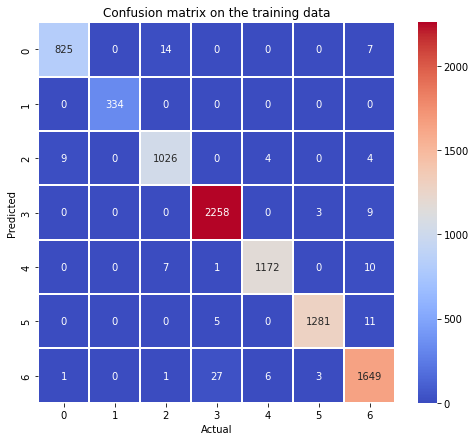

Validation Accuarcy =  0.9275496077526534


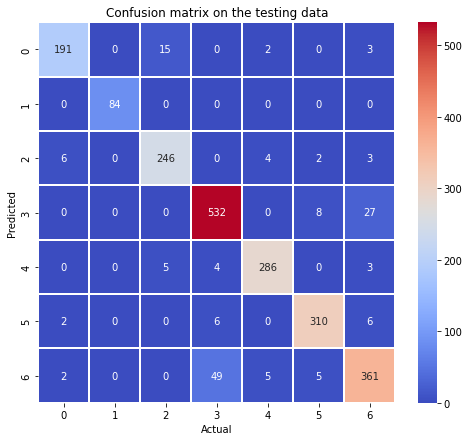

In [18]:
model = CatBoostClassifier(verbose=False)
pipe = Pipeline(steps=[('sc', StandardScaler()), ('catboost', model)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
print('Training Accuarcy = ', f1_score(y_train, y_pred, average='micro'))

plot_confusion_matrix(pipe, y_train, y_pred, 'training')

y_pred = pipe.predict(X_test)
print('Validation Accuarcy = ', f1_score(y_test, y_pred, average='micro'))

plot_confusion_matrix(pipe, y_test, y_pred, 'testing')

Training Accuarcy =  0.988808122764509


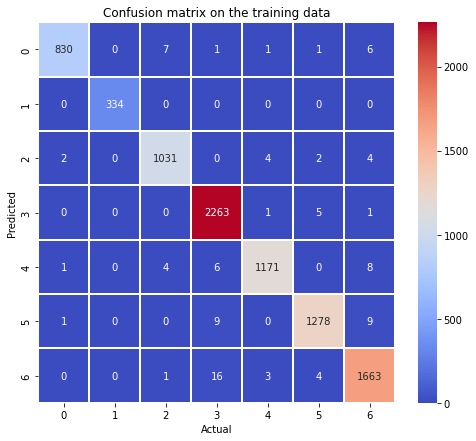

Validation Accuarcy =  0.9275496077526534


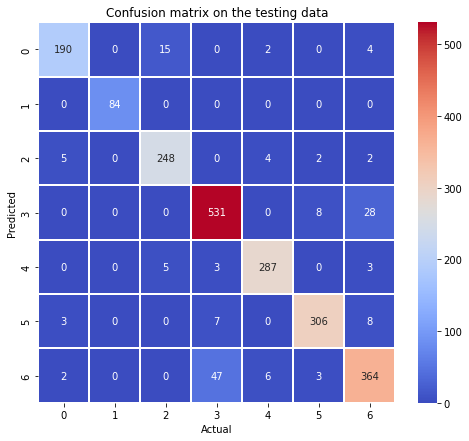

In [19]:
param_dist = {'n_estimators': 1000,
              'max_depth': 15,
              'random_state': 465,
              'subsample': 0.3,
              'verbosity': 0,
              'learning_rate':0.01,
             'use_label_encoder':False}

model = XGBClassifier(**param_dist)

pipe = Pipeline(steps=[('sc', StandardScaler()), ('xgboost', model)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)
print('Training Accuarcy = ', f1_score(y_train, y_pred, average='micro'))

plot_confusion_matrix(pipe, y_train, y_pred, 'training')

y_pred = pipe.predict(X_test)
print('Validation Accuarcy = ', f1_score(y_test, y_pred, average='micro'))

plot_confusion_matrix(pipe, y_test, y_pred, 'testing')